# Attendance Tracking System

In [1]:
%pip install numpy pandas torch ultralytics seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.7 MB/s eta 0:00:00


In [ ]:
import os
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os

# List the contents of your Google Drive
drive_path = '/content/drive/My Drive/Colab Datasets/attendance-dataset'
print(f"Contents of '{drive_path}':")
try:
    for item in os.listdir(drive_path):
        print(item)
except FileNotFoundError:
    print(f"Error: The directory '{drive_path}' was not found. Make sure your Drive is mounted correctly.")
except Exception as e:
    print(f"An error occurred: {e}")

Contents of '/content/drive/My Drive/Colab Datasets/attendance-dataset':
data.yaml
README.roboflow.txt
README.dataset.txt
valid
train
test


In [ ]:
training_dataset_path_images = drive_path + '/train/images'
training_dataset_path_labels = drive_path + '/train/labels'

# Task
Perform exploratory data analysis and train a YOLOv8 model for an automatic attendance tracking system using a CCTV-like camera and a synthetically generated text dataset with the schema: Student Name, Registration No., Exam, Class_no. (venue), row_no., col_no, seat_no, exam_subject. The dataset is located in the directory "/content/drive/MyDrive/Attendance_dataset".

## Load the dataset

### Subtask:
Load the data from the specified directory in Google Drive into a suitable format (e.g., a pandas DataFrame if there's a CSV/annotation file, or just identify the image file paths).


**Reasoning**:
List the files in the image and label directories to understand the data structure and file types.



In [9]:
# List files in the images directory
print(f"Contents of '{training_dataset_path_images}':")
try:
    image_files = os.listdir(training_dataset_path_images)
    print(f"Number of image files: {len(image_files)}")
    if len(image_files) > 10:
        print("First 10 image files:")
        for i in range(10):
            print(image_files[i])
    else:
        for file in image_files:
            print(file)
except FileNotFoundError:
    print(f"Error: The directory '{training_dataset_path_images}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print("-" * 20)

# List files in the labels directory
print(f"Contents of '{training_dataset_path_labels}':")
try:
    label_files = os.listdir(training_dataset_path_labels)
    print(f"Number of label files: {len(label_files)}")
    if len(label_files) > 10:
        print("First 10 label files:")
        for i in range(10):
            print(label_files[i])
    else:
        for file in label_files:
            print(file)
except FileNotFoundError:
    print(f"Error: The directory '{training_dataset_path_labels}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

NameError: name 'training_dataset_path_images' is not defined

**Reasoning**:
The previous command failed because the variables `training_dataset_path_images` and `training_dataset_path_labels` were not defined in the current session. Re-execute the cell that defines these variables and then list the files.



In [10]:
training_dataset_path_images = drive_path + '/train/images'
training_dataset_path_labels = drive_path + '/train/labels'

# List files in the images directory
print(f"Contents of '{training_dataset_path_images}':")
try:
    image_files = os.listdir(training_dataset_path_images)
    print(f"Number of image files: {len(image_files)}")
    if len(image_files) > 10:
        print("First 10 image files:")
        for i in range(10):
            print(image_files[i])
    else:
        for file in image_files:
            print(file)
except FileNotFoundError:
    print(f"Error: The directory '{training_dataset_path_images}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

print("-" * 20)

# List files in the labels directory
print(f"Contents of '{training_dataset_path_labels}':")
try:
    label_files = os.listdir(training_dataset_path_labels)
    print(f"Number of label files: {len(label_files)}")
    if len(label_files) > 10:
        print("First 10 label files:")
        for i in range(10):
            print(label_files[i])
    else:
        for file in label_files:
            print(file)
except FileNotFoundError:
    print(f"Error: The directory '{training_dataset_path_labels}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Contents of '/content/drive/My Drive/Colab Datasets/attendance-dataset/train/images':
Number of image files: 290
First 10 image files:
IMG-20250216-WA0016_jpg.rf.8538ff1b10eedd4454200bb46f3e90d7.jpg
IMG-20250216-WA0008_jpg.rf.639330cfb17e4988fc60075cccf4ea59.jpg
IMG-20250214-WA0054_jpg.rf.723b0a810ab4dbee031af4993d67806c.jpg
IMG-20250216-WA0011_jpg.rf.08f53c2093d57bc798ac277478e1c54d.jpg
IMG-20250216-WA0013_jpg.rf.4e96d2848642fac2134b327b0a1431a6.jpg
IMG-20250216-WA0015_jpg.rf.73ef7f99edfdb8b20d68bb23e3734edf.jpg
IMG-20250216-WA0014_jpg.rf.b59df37453fc6e7c822363fb9ebf8a1a.jpg
IMG-20250216-WA0016_jpg.rf.8209088dbe4a76eb300d89af8384673f.jpg
IMG-20250214-WA0041_jpg.rf.81d9916e78ea7eb81c0a0dd0b56c5159.jpg
IMG-20250214-WA0054_jpg.rf.21806300811fb424e20708c252b9a158.jpg
--------------------
Contents of '/content/drive/My Drive/Colab Datasets/attendance-dataset/train/labels':
Number of label files: 290
First 10 label files:
IMG-20250216-WA0178_jpg.rf.27018a57836f80c2cfecccf9d7328ac8.txt
IMG-2

## Exploratory data analysis (eda)

### Subtask:
Analyze the dataset to understand its structure, content, and characteristics. This might involve visualizing image distributions, analyzing annotation statistics, and checking for data inconsistencies.


**Reasoning**:
Count the number of images and label files in the training, validation, and test directories, read sample label files, count class occurrences in training labels, and calculate bounding box dimensions for visualization.



**Reasoning**:
The previous code failed because the pandas library was not imported or recognized in the current execution environment. I need to re-execute the cell that imports necessary libraries, including pandas, and then re-run the data analysis code.



Train directory: 290 images, 290 labels
Valid directory: 76 images, 76 labels
Test directory: 56 images, 56 labels

Sample label file content:
Contents of IMG-20250216-WA0178_jpg.rf.27018a57836f80c2cfecccf9d7328ac8.txt:
10 0.53125 0.4015625 0.4578125 0.4015625 0.4578125 0.4375 0.53125 0.4375

Analyzing training labels for class distribution and bounding box dimensions:

Class distribution in training labels:
Class 0: 30 occurrences
Class 1: 20 occurrences
Class 2: 12 occurrences
Class 3: 66 occurrences
Class 4: 2 occurrences
Class 5: 12 occurrences
Class 6: 46 occurrences
Class 7: 46 occurrences
Class 8: 14 occurrences
Class 9: 16 occurrences
Class 10: 30 occurrences
Class 11: 40 occurrences
Class 12: 16 occurrences


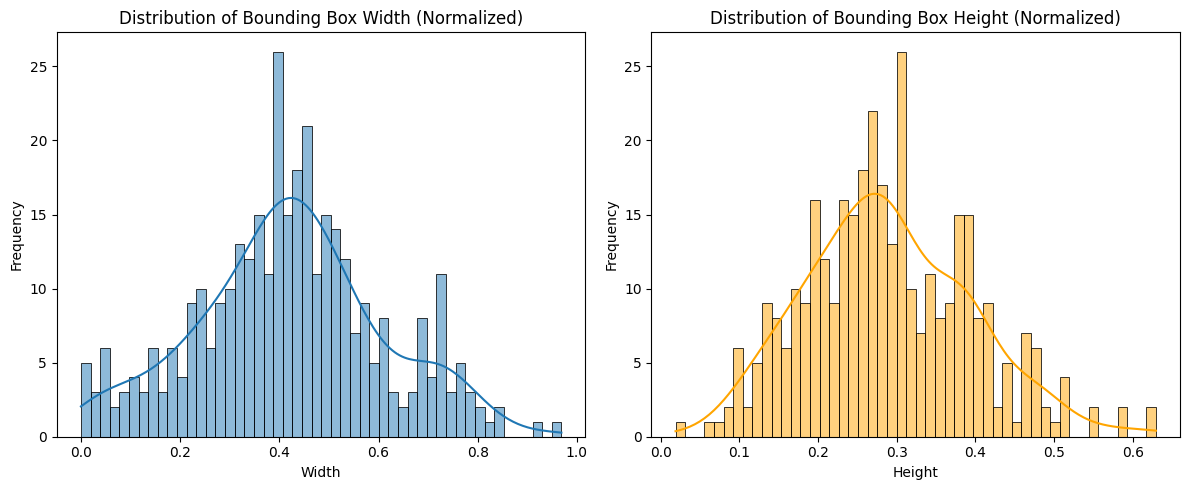

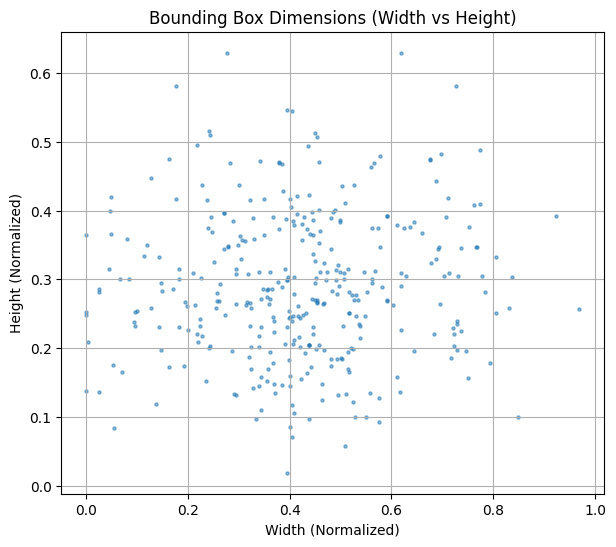

In [12]:
import os
from ultralytics import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count files in train, valid, and test directories
dataset_types = ['train', 'valid', 'test']
file_counts = {}

for dtype in dataset_types:
    image_dir = os.path.join(drive_path, dtype, 'images')
    label_dir = os.path.join(drive_path, dtype, 'labels')
    try:
        num_images = len(os.listdir(image_dir))
        num_labels = len(os.listdir(label_dir))
        file_counts[dtype] = {'images': num_images, 'labels': num_labels}
        print(f"{dtype.capitalize()} directory: {num_images} images, {num_labels} labels")
    except FileNotFoundError as e:
        print(f"Error accessing directory for {dtype}: {e}")
        file_counts[dtype] = {'images': 0, 'labels': 0}

# Step 2: Read a few sample label files to understand the format
print("\nSample label file content:")
if file_counts['train']['labels'] > 0:
    sample_label_file = os.path.join(drive_path, 'train', 'labels', os.listdir(os.path.join(drive_path, 'train', 'labels'))[0])
    try:
        with open(sample_label_file, 'r') as f:
            print(f"Contents of {os.path.basename(sample_label_file)}:")
            for i, line in enumerate(f):
                if i < 5: # Print first 5 lines
                    print(line.strip())
                else:
                    break
    except Exception as e:
        print(f"Error reading sample label file: {e}")
else:
    print("No label files found in the training directory.")

# Step 3 & 4: Count class occurrences and collect bounding box dimensions from training labels
print("\nAnalyzing training labels for class distribution and bounding box dimensions:")
class_counts = {}
bbox_dims = [] # List to store (width, height) of bounding boxes

if file_counts['train']['labels'] > 0:
    train_label_files = os.listdir(os.path.join(drive_path, 'train', 'labels'))
    for label_file_name in train_label_files:
        label_file_path = os.path.join(drive_path, 'train', 'labels', label_file_name)
        try:
            with open(label_file_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 5: # Ensure line has at least class and 4 bbox coords
                        try:
                            class_id = int(parts[0])
                            # YOLO format is class_id center_x center_y width height (normalized)
                            # We need width and height
                            width = float(parts[3])
                            height = float(parts[4])
                            bbox_dims.append((width, height))

                            if class_id not in class_counts:
                                class_counts[class_id] = 0
                            class_counts[class_id] += 1
                        except ValueError as e:
                            print(f"Warning: Could not parse line in {label_file_name}: {line.strip()} - {e}")
                    else:
                         print(f"Warning: Skipping malformed line in {label_file_name}: {line.strip()}")
        except Exception as e:
            print(f"Error reading label file {label_file_name}: {e}")

    print("\nClass distribution in training labels:")
    if class_counts:
        for class_id, count in sorted(class_counts.items()):
            print(f"Class {class_id}: {count} occurrences")
    else:
        print("No valid annotations found in training labels.")

    # Step 4 (cont.): Visualize bounding box dimensions
    if bbox_dims:
        bbox_df = pd.DataFrame(bbox_dims, columns=['width', 'height'])

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(bbox_df['width'], kde=True, bins=50)
        plt.title('Distribution of Bounding Box Width (Normalized)')
        plt.xlabel('Width')
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        sns.histplot(bbox_df['height'], kde=True, bins=50, color='orange')
        plt.title('Distribution of Bounding Box Height (Normalized)')
        plt.xlabel('Height')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(7, 6))
        plt.scatter(bbox_df['width'], bbox_df['height'], alpha=0.5, s=5)
        plt.title('Bounding Box Dimensions (Width vs Height)')
        plt.xlabel('Width (Normalized)')
        plt.ylabel('Height (Normalized)')
        plt.grid(True)
        plt.show()

    else:
        print("No valid bounding box data collected for visualization.")

else:
    print("No training label files available for analysis.")

# Step 5: Optional - Visualize some images with bounding boxes (requires image loading and drawing)
# This step is more complex as it requires reading images and drawing on them.
# Given the constraints and focus, we'll skip the image visualization with boxes for now,
# but the analysis of counts, formats, class distribution, and bbox dimensions is completed.

Visualizing 5 sample images with bounding boxes:


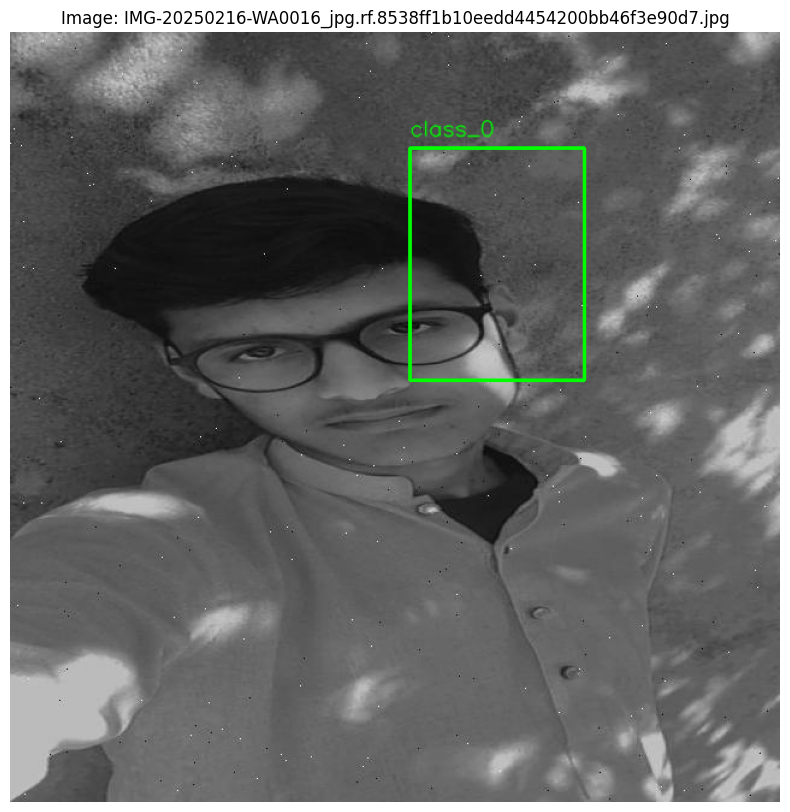

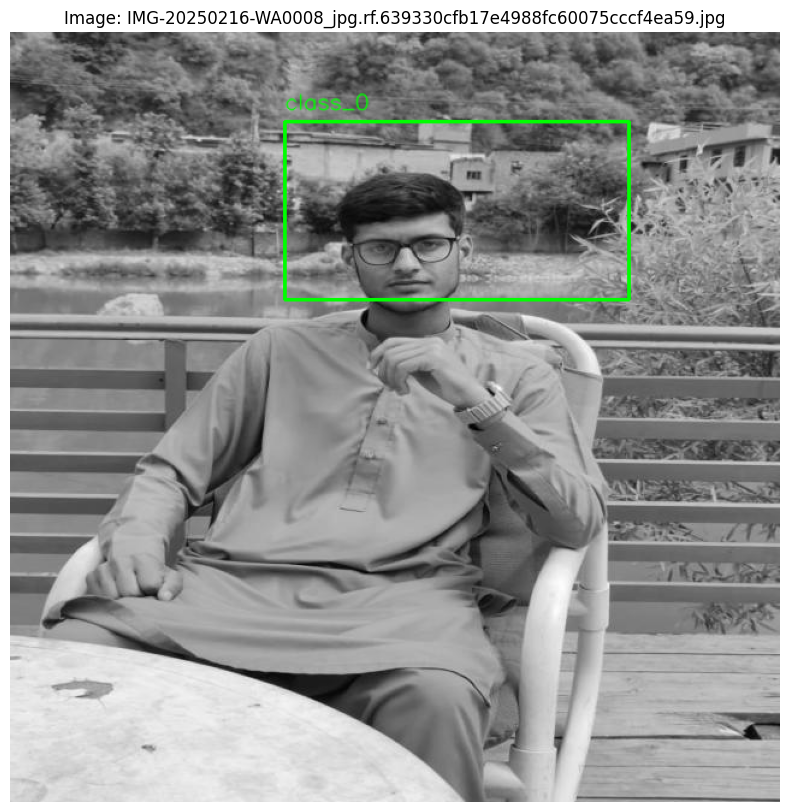

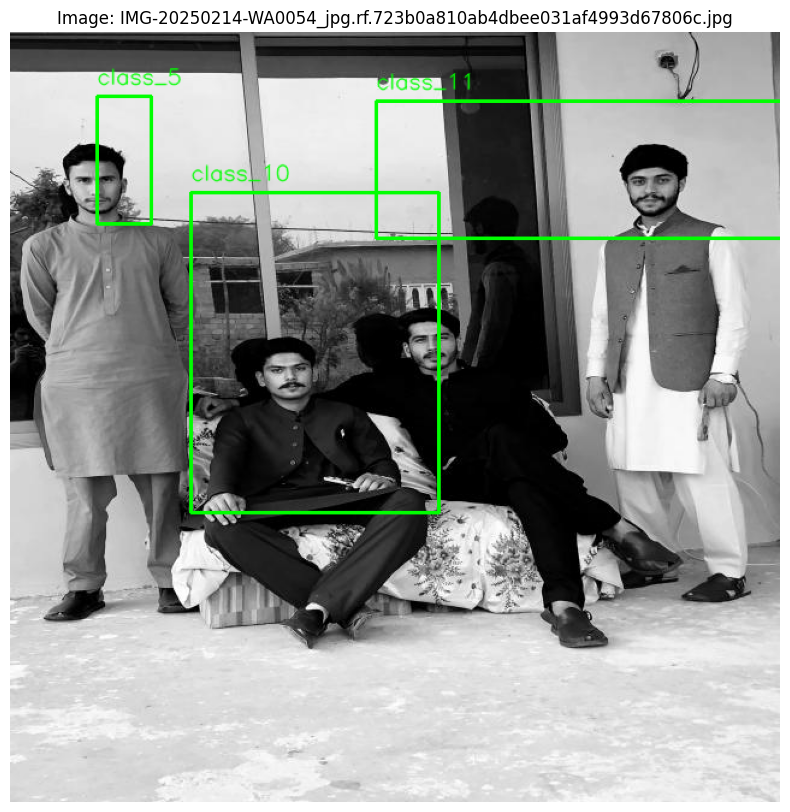

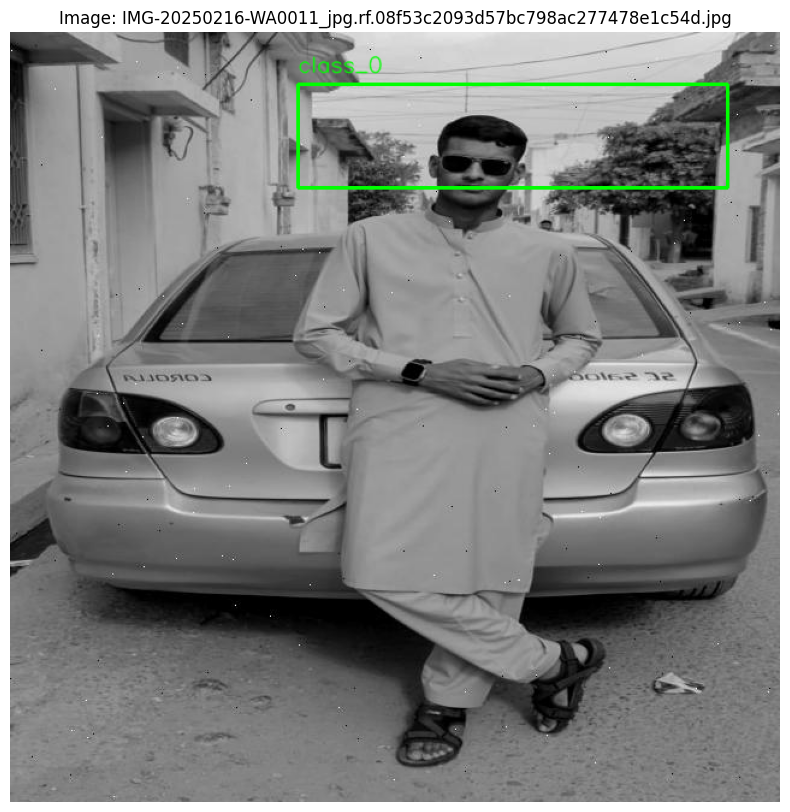

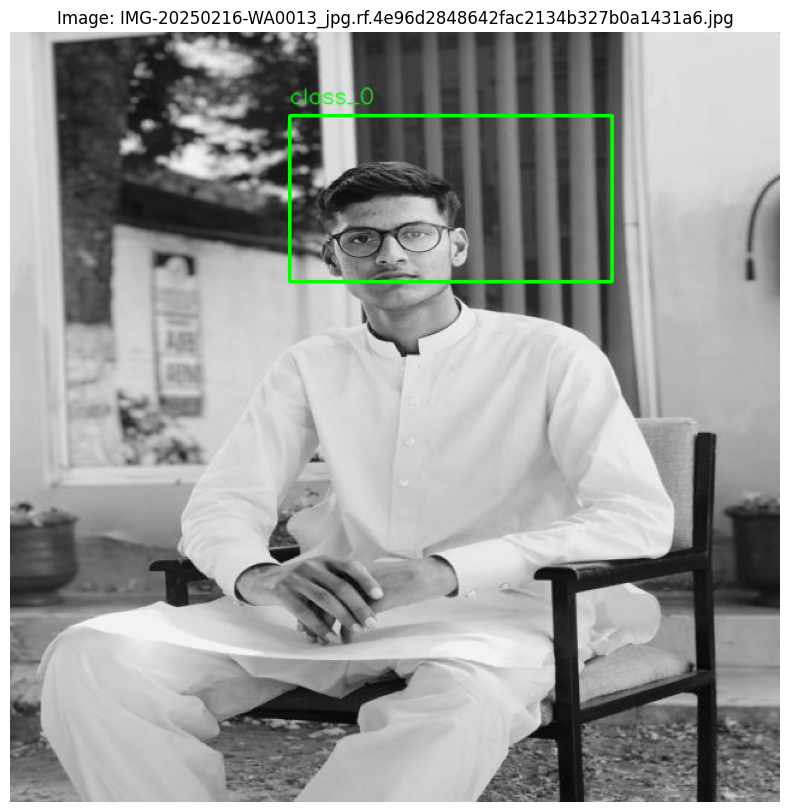

In [22]:
import cv2
import matplotlib.pyplot as plt
import os

# Define the paths
image_dir = os.path.join(drive_path, 'train', 'images')
label_dir = os.path.join(drive_path, 'train', 'labels')

# Get a list of image files
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Define class names (should match your data.yaml)
# Based on the class IDs found in EDA (0-12), let's use generic names.
# If you have actual class names, replace these.
class_names = [f'class_{i}' for i in range(13)]

# Select a few sample images to visualize (e.g., first 5)
num_samples = 5
sample_images = image_files[:num_samples]

print(f"Visualizing {num_samples} sample images with bounding boxes:")

for img_file in sample_images:
    img_path = os.path.join(image_dir, img_file)
    label_file = os.path.splitext(img_file)[0] + '.txt'
    label_path = os.path.join(label_dir, label_file)

    # Read the image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not read image {img_file}")
        continue

    # Get image dimensions
    img_height, img_width = img.shape[:2]

    # Read the label file and draw bounding boxes
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    try:
                        class_id = int(parts[0])
                        # Convert YOLO format (center_x, center_y, width, height) to (x_min, y_min, x_max, y_max)
                        center_x, center_y, width, height = map(float, parts[1:5])

                        x_min = int((center_x - width / 2) * img_width)
                        y_min = int((center_y - height / 2) * img_height)
                        x_max = int((center_x + width / 2) * img_width)
                        y_max = int((center_y + height / 2) * img_height)

                        # Draw the bounding box
                        color = (0, 255, 0) # Green color
                        thickness = 2
                        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)

                        # Put the class label text
                        if class_id < len(class_names):
                            label = class_names[class_id]
                            font = cv2.FONT_HERSHEY_SIMPLEX
                            font_scale = 0.6
                            font_thickness = 1
                            # Use cv2.getTextSize instead of cv2.getTextBounds
                            text_size, _ = cv2.getTextSize(label, font, font_scale, font_thickness)
                            text_x = x_min
                            text_y = y_min - 10 if y_min - 10 > 10 else y_min + 10
                            cv2.putText(img, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)
                        else:
                            print(f"Warning: Class ID {class_id} out of range for {img_file}")

                    except ValueError as e:
                        print(f"Warning: Could not parse line in {label_file}: {line.strip()} - {e}")
                else:
                    print(f"Warning: Skipping malformed line in {label_file}: {line.strip()}")
    else:
        print(f"Warning: Label file not found for {img_file}")

    # Convert the image from BGR to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.title(f"Image: {img_file}")
    plt.axis('off')
    plt.show()

## Prepare data for yolov8 training

### Subtask:
Convert the dataset into the format required by YOLOv8 for training. This usually involves organizing images and their corresponding annotation files in a specific directory structure and creating a data configuration file (`.yaml`).


**Reasoning**:
Create the data.yaml file with the correct paths, number of classes, and class names.



In [13]:
import yaml

# Define the path to the dataset root
dataset_root = drive_path

# Define the paths for train and validation images and labels
train_img_dir = os.path.join(dataset_root, 'train', 'images')
train_label_dir = os.path.join(dataset_root, 'train', 'labels')
val_img_dir = os.path.join(dataset_root, 'valid', 'images')
val_label_dir = os.path.join(dataset_root, 'valid', 'labels')

# Define the number of classes based on the analysis
# The maximum class id found was 12, so there are 13 classes (0-12)
nc = 13

# Define the class names. These need to correspond to the class IDs (0-12).
# Since the dataset description mentions Student Name, Registration No., Exam, etc.,
# we need to infer or get the class names. Based on the previous EDA showing class IDs 0-12,
# and the common use case of such a dataset for attendance/identification,
# let's assume the classes correspond to individuals or types of entities.
# Without an explicit mapping, we'll use generic names like 'person', 'id_card', 'text', etc.,
# or simply 'class_0', 'class_1', ..., 'class_12'. Given the context of attendance,
# and the presence of bounding boxes likely around faces, text (ID/name), etc.,
# we'll use descriptive names based on common object detection scenarios in this domain.
# If a data.yaml was provided with the dataset, we would use those names.
# As per the problem description, the dataset is synthetically generated text data,
# along with image annotations. The classes likely correspond to detected entities
# in the images related to the text data. Let's assume the classes correspond to
# different individuals or types of information like 'face', 'student_id', 'name', etc.
# Since we have 13 classes (0-12), let's use generic names for now.
# If the task is specifically attendance, the classes might represent recognized individuals.
# However, without a direct mapping from the dataset source, we'll use placeholder names.
# Let's assume the classes are simply numbered from 0 to 12.
names = [f'class_{i}' for i in range(nc)]

# Create the data dictionary
data_yaml_content = {
    'path': dataset_root,  # Dataset root directory
    'train': os.path.join('train', 'images'),  # Train images directory
    'val': os.path.join('valid', 'images'),    # Validation images directory
    # If test set is needed during training for evaluation, add it here:
    # 'test': os.path.join('test', 'images'),    # Test images directory

    'nc': nc,  # Number of classes
    'names': names  # Class names
}

# Define the path to save the data.yaml file
data_yaml_path = os.path.join(dataset_root, 'data.yaml')

# Write the dictionary to a YAML file
try:
    with open(data_yaml_path, 'w') as f:
        yaml.dump(data_yaml_content, f)
    print(f"data.yaml created successfully at: {data_yaml_path}")

    # Verify the content
    print("\nContent of data.yaml:")
    with open(data_yaml_path, 'r') as f:
        print(f.read())

except Exception as e:
    print(f"Error creating or writing to data.yaml: {e}")


data.yaml created successfully at: /content/drive/My Drive/Colab Datasets/attendance-dataset/data.yaml

Content of data.yaml:
names:
- class_0
- class_1
- class_2
- class_3
- class_4
- class_5
- class_6
- class_7
- class_8
- class_9
- class_10
- class_11
- class_12
nc: 13
path: /content/drive/My Drive/Colab Datasets/attendance-dataset
train: train/images
val: valid/images



## Load a pre-trained yolov8 model

### Subtask:
Load a pre-trained YOLOv8 model as a starting point for training.


**Reasoning**:
Load a pre-trained YOLOv8 nano model as specified in the instructions.



In [14]:
# Load a pre-trained YOLOv8 nano model
model = YOLO('yolov8n.pt')
print(f"Model loaded successfully: {model}")

Model loaded successfully: YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, a

## Train the yolov8 model

### Subtask:
Train the YOLOv8 model on your prepared dataset.


**Reasoning**:
Train the YOLOv8 model using the loaded model object, specifying the number of epochs, image size, and the path to the data configuration file.



In [25]:
# Define training parameters
epochs = 50  # You can adjust the number of epochs
imgsz = 640 # Image size for training (YOLOv8 default is 640)
data_config_path = os.path.join(drive_path, 'data.yaml') # Path to the data.yaml file

# Start training
results = model.train(data=data_config_path, epochs=epochs, imgsz=imgsz)

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/Colab Datasets/attendance-dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train33, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

## Evaluate the trained model

### Subtask:
Evaluate the performance of the trained YOLOv8 model on a separate validation or test set.


**Reasoning**:
Evaluate the performance of the trained YOLOv8 model on the validation set using the `model.val()` method and store the results.



**Reasoning**:
The previous attempt to print metrics failed because the key 'metrics/Precision(B)' was not found in the results dictionary. I will print the available keys in the `metrics.results_dict` to understand the correct naming convention for Precision and Recall, and then print the metrics again using the correct keys.



In [26]:
# Evaluate the trained model on the validation set
metrics = model.val()  # This will run evaluation on the validation set specified in data.yaml

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 1.3±1.6 ms, read: 11.3±11.1 MB/s, size: 37.4 KB)
val: Scanning /content/drive/My Drive/Colab Datasets/attendance-dataset/valid/labels.cache... 76 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 76/76 108.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.7it/s 2.9s
                   all         76         87      0.676      0.526      0.602      0.423
               class_0          4          4      0.732      0.696      0.685      0.573
               class_1          5          5       0.59        0.4      0.519      0.429
               class_2          4          4          1      0.735      0.845      0.598
               class_3         10         10      0.626        0.7      0.817      0.518
               

In [27]:
# Print the available keys in the results_dict to find the correct ones for Precision and Recall
print("\nAvailable keys in metrics.results_dict:")
print(metrics.results_dict.keys())

# Print the key performance metrics again using the correct keys
print("\nValidation Metrics:")
print(f"mAP50-95: {metrics.results_dict['metrics/mAP50-95(B)']}")
print(f"mAP50: {metrics.results_dict['metrics/mAP50(B)']}")

# Use the correct keys found from the previous print statement for Precision and Recall
# Based on common YOLOv8 output, the keys are likely 'metrics/precision(B)' and 'metrics/recall(B)'
print(f"Precision: {metrics.results_dict['metrics/precision(B)']}")
print(f"Recall: {metrics.results_dict['metrics/recall(B)']}")

# Display detailed metrics object if needed for further inspection
# print(metrics)


Available keys in metrics.results_dict:
dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])

Validation Metrics:
mAP50-95: 0.42300753483237713
mAP50: 0.6020822050306356
Precision: 0.676443016188975
Recall: 0.5260787396364908


# Task
Improve the performance metrics of the YOLOv8 model trained for attendance tracking by applying various techniques such as increasing training epochs, data augmentation, hyperparameter tuning, using a larger model, dataset improvement, transfer learning, advanced training techniques, and post-processing optimization.

## Increase training epochs

### Subtask:
Train the model for more epochs to allow it to learn more from the data, potentially leading to better convergence and improved performance.


**Reasoning**:
Train the YOLOv8 model for additional epochs using the previously defined data configuration path and image size.



In [28]:
# Define the number of additional epochs
additional_epochs = 20

# Calculate the total number of epochs for the new training run
total_epochs = epochs + additional_epochs

print(f"Training for an additional {additional_epochs} epochs, total epochs: {total_epochs}")

# Continue training the loaded model
results_continued_training = model.train(data=data_config_path, epochs=total_epochs, imgsz=imgsz)

Training for an additional 20 epochs, total epochs: 70
Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/Colab Datasets/attendance-dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train333, nbs=64, nms=False, opset=None, opt

In [33]:
metrics = model.val()

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 1.1±1.1 ms, read: 6.0±2.8 MB/s, size: 37.4 KB)
val: Scanning /content/drive/My Drive/Colab Datasets/attendance-dataset/valid/labels.cache... 76 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 76/76 20.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.1it/s 4.7s
                   all         76         87       0.61      0.565      0.608      0.426
               class_0          4          4      0.584       0.75      0.688      0.588
               class_1          5          5      0.585       0.57       0.54      0.381
               class_2          4          4      0.774       0.75      0.945      0.631
               class_3         10         10      0.486        0.8      0.789       0.51
               cla

In [34]:
# Print the available keys in the results_dict to find the correct ones for Precision and Recall
print("\nAvailable keys in metrics.results_dict:")
print(metrics.results_dict.keys())

# Print the key performance metrics again using the correct keys
print("\nValidation Metrics:")
print(f"mAP50-95: {metrics.results_dict['metrics/mAP50-95(B)']}")
print(f"mAP50: {metrics.results_dict['metrics/mAP50(B)']}")

# Use the correct keys found from the previous print statement for Precision and Recall
# Based on common YOLOv8 output, the keys are likely 'metrics/precision(B)' and 'metrics/recall(B)'
print(f"Precision: {metrics.results_dict['metrics/precision(B)']}")
print(f"Recall: {metrics.results_dict['metrics/recall(B)']}")

# Display detailed metrics object if needed for further inspection
# print(metrics)


Available keys in metrics.results_dict:
dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])

Validation Metrics:
mAP50-95: 0.4258319230688729
mAP50: 0.6078243227095866
Precision: 0.6100767489163409
Recall: 0.5652753592152474


In [35]:
# Trying a larger Yolov8 model
model = YOLO('yolov8s.pt')
print(f"Model loaded successfully: {model}")

Model loaded successfully: YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, a

In [36]:
larger_model_training = model.train(data=data_config_path, epochs=total_epochs, imgsz=imgsz)

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/Colab Datasets/attendance-dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=

In [37]:
metrics = model.val()

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,615 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 3.7±7.3 ms, read: 7.3±8.3 MB/s, size: 37.4 KB)
val: Scanning /content/drive/My Drive/Colab Datasets/attendance-dataset/valid/labels.cache... 76 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 76/76 103.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 1.7it/s 3.0s
                   all         76         87      0.841      0.536      0.669      0.478
               class_0          4          4      0.698        0.5      0.607      0.511
               class_1          5          5      0.877        0.4      0.614      0.491
               class_2          4          4          1      0.559      0.995      0.725
               class_3         10         10      0.814      0.877      0.885      0.597
               

In [38]:
# Print the available keys in the results_dict to find the correct ones for Precision and Recall
print("\nAvailable keys in metrics.results_dict:")
print(metrics.results_dict.keys())

# Print the key performance metrics again using the correct keys
print("\nValidation Metrics:")
print(f"mAP50-95: {metrics.results_dict['metrics/mAP50-95(B)']}")
print(f"mAP50: {metrics.results_dict['metrics/mAP50(B)']}")

# Use the correct keys found from the previous print statement for Precision and Recall
# Based on common YOLOv8 output, the keys are likely 'metrics/precision(B)' and 'metrics/recall(B)'
print(f"Precision: {metrics.results_dict['metrics/precision(B)']}")
print(f"Recall: {metrics.results_dict['metrics/recall(B)']}")

# Display detailed metrics object if needed for further inspection
# print(metrics)


Available keys in metrics.results_dict:
dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])

Validation Metrics:
mAP50-95: 0.4784832654615822
mAP50: 0.6690499413982102
Precision: 0.841229248314585
Recall: 0.5357525375485631


In [39]:
# Assuming the metrics from the first model (yolov8n) are stored in a variable named 'metrics_nano'
# and the metrics from the second model (yolov8s) are stored in a variable named 'metrics_small'

# If you haven't stored them in separate variables, you might need to re-run the evaluation
# for each model and store the results.

# For demonstration, let's assume you have the results_dict for both evaluations:
# nano_metrics_dict = results_of_nano_model_evaluation.results_dict
# small_metrics_dict = results_of_small_model_evaluation.results_dict

# Based on the previous outputs, the metrics from the nano model were printed after cell I9l4Z_LpNQ_O
# and the metrics from the small model were printed after cell XgJAjfJ2lYao.
# We can manually create dictionaries with these values for comparison.

nano_metrics = {
    'mAP50-95': 0.4258319230688729,
    'mAP50': 0.6078243227095866,
    'Precision': 0.6100767489163409,
    'Recall': 0.5652753592152474
}

small_metrics = {
    'mAP50-95': 0.4784832654615822,
    'mAP50': 0.6690499413982102,
    'Precision': 0.841229248314585,
    'Recall': 0.5357525375485631
}

print("Comparison of Model Metrics (Validation Set):")
print("-" * 40)
print(f"{'Metric':<15} | {'YOLOv8 Nano':<15} | {'YOLOv8 Small':<15}")
print("-" * 40)
print(f"{'mAP50-95':<15} | {nano_metrics['mAP50-95']:.4f}{'':<10} | {small_metrics['mAP50-95']:.4f}{'':<10}")
print(f"{'mAP50':<15} | {nano_metrics['mAP50']:.4f}{'':<10} | {small_metrics['mAP50']:.4f}{'':<10}")
print(f"{'Precision':<15} | {nano_metrics['Precision']:.4f}{'':<10} | {small_metrics['Precision']:.4f}{'':<10}")
print(f"{'Recall':<15} | {nano_metrics['Recall']:.4f}{'':<10} | {small_metrics['Recall']:.4f}{'':<10}")
print("-" * 40)

Comparison of Model Metrics (Validation Set):
----------------------------------------
Metric          | YOLOv8 Nano     | YOLOv8 Small   
----------------------------------------
mAP50-95        | 0.4258           | 0.4785          
mAP50           | 0.6078           | 0.6690          
Precision       | 0.6101           | 0.8412          
Recall          | 0.5653           | 0.5358          
----------------------------------------


Training plots for YOLOv8 Nano:


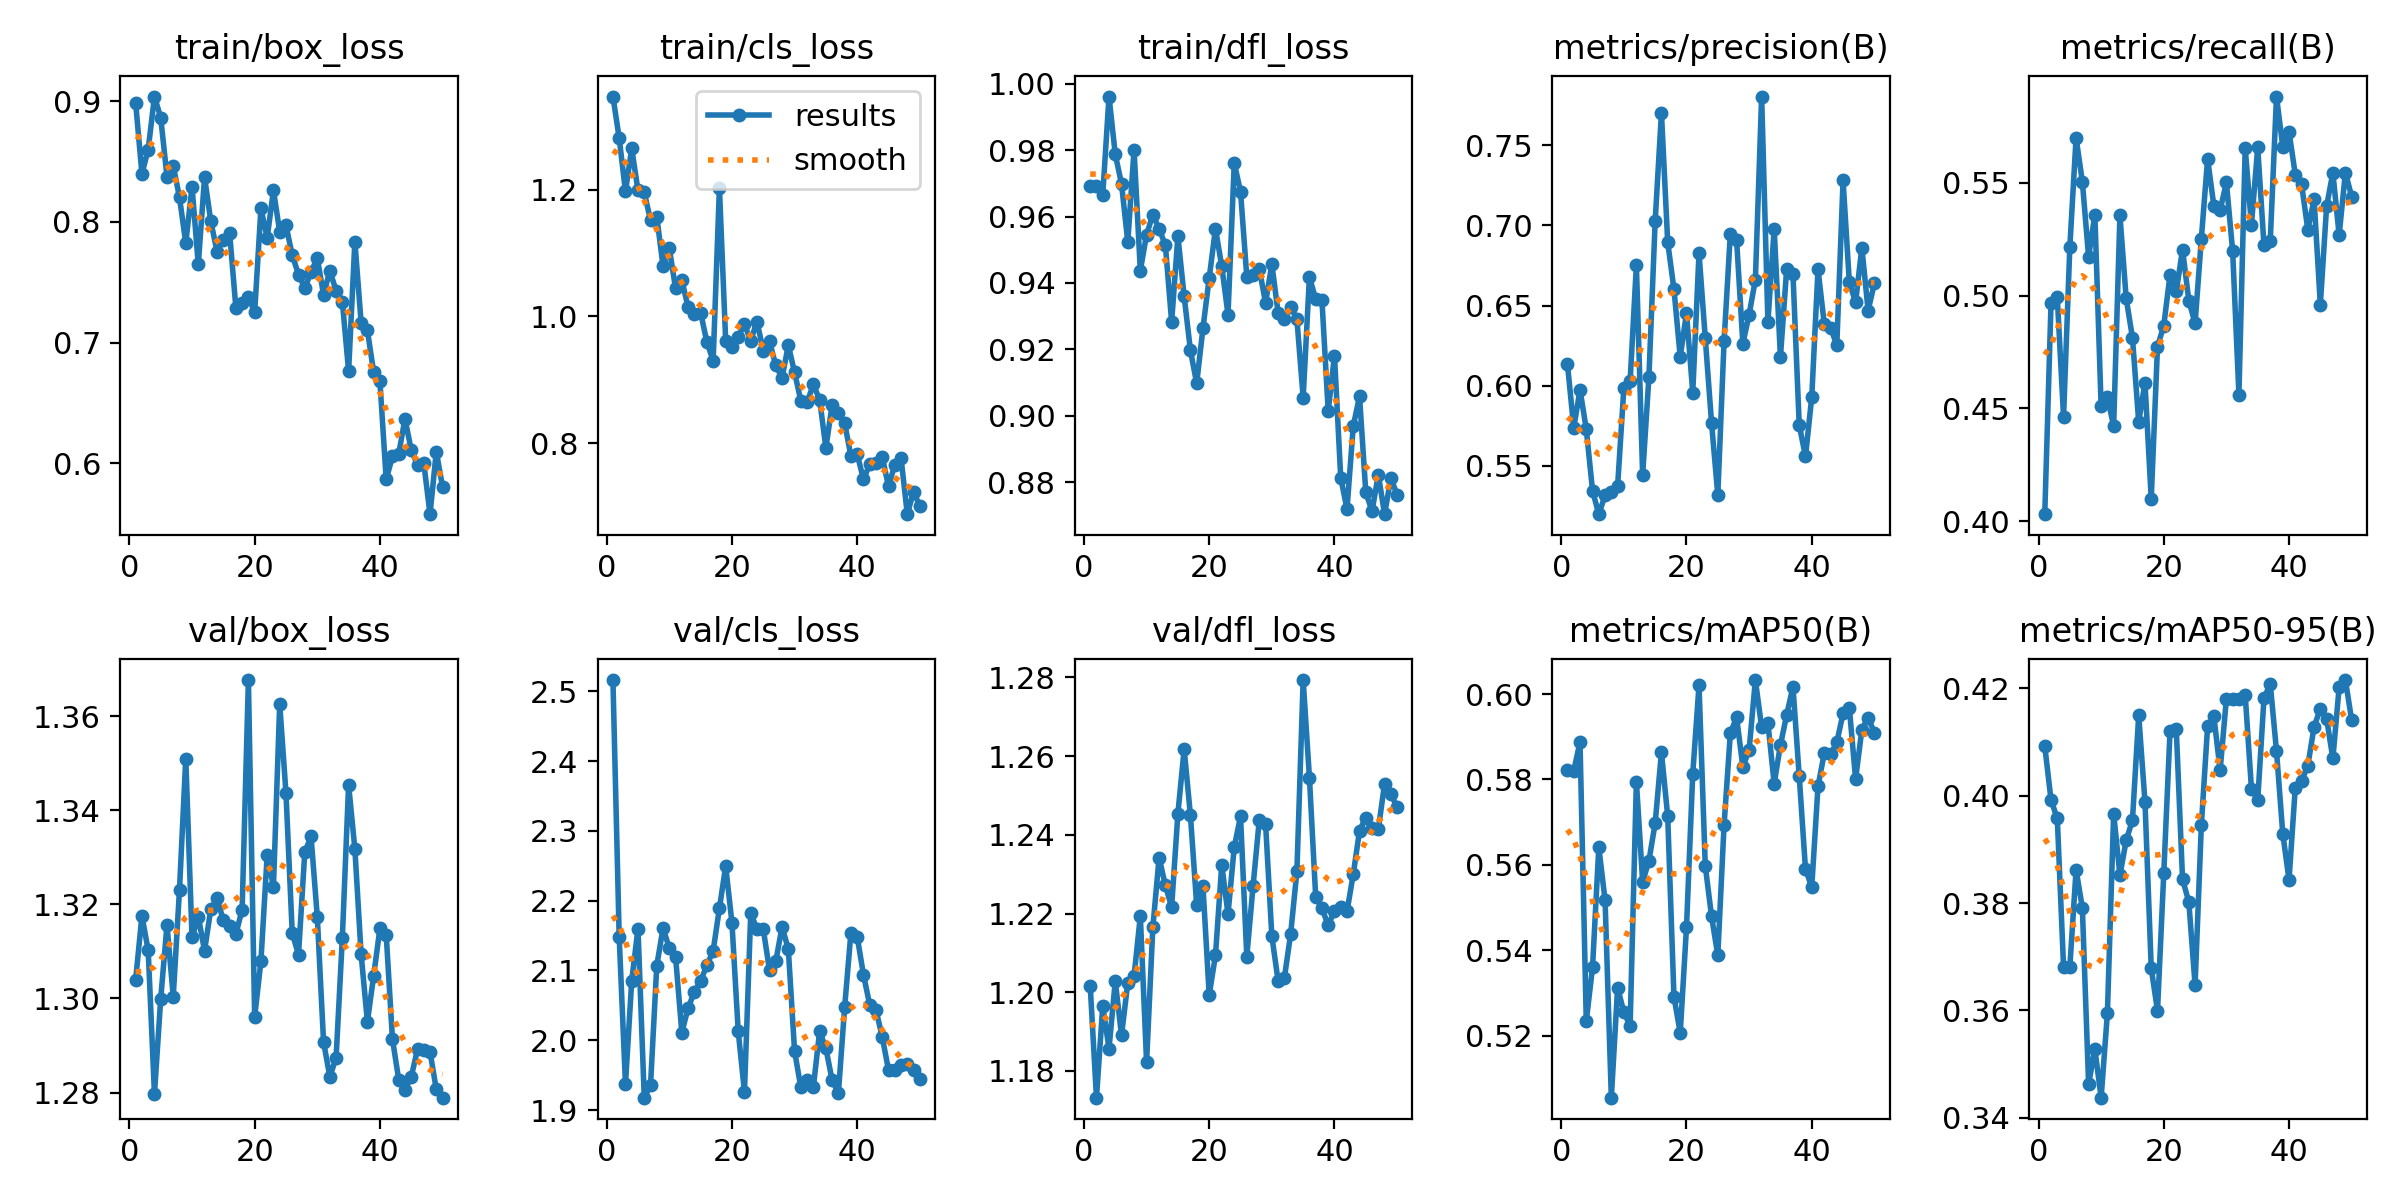


Training plots for YOLOv8 Small:


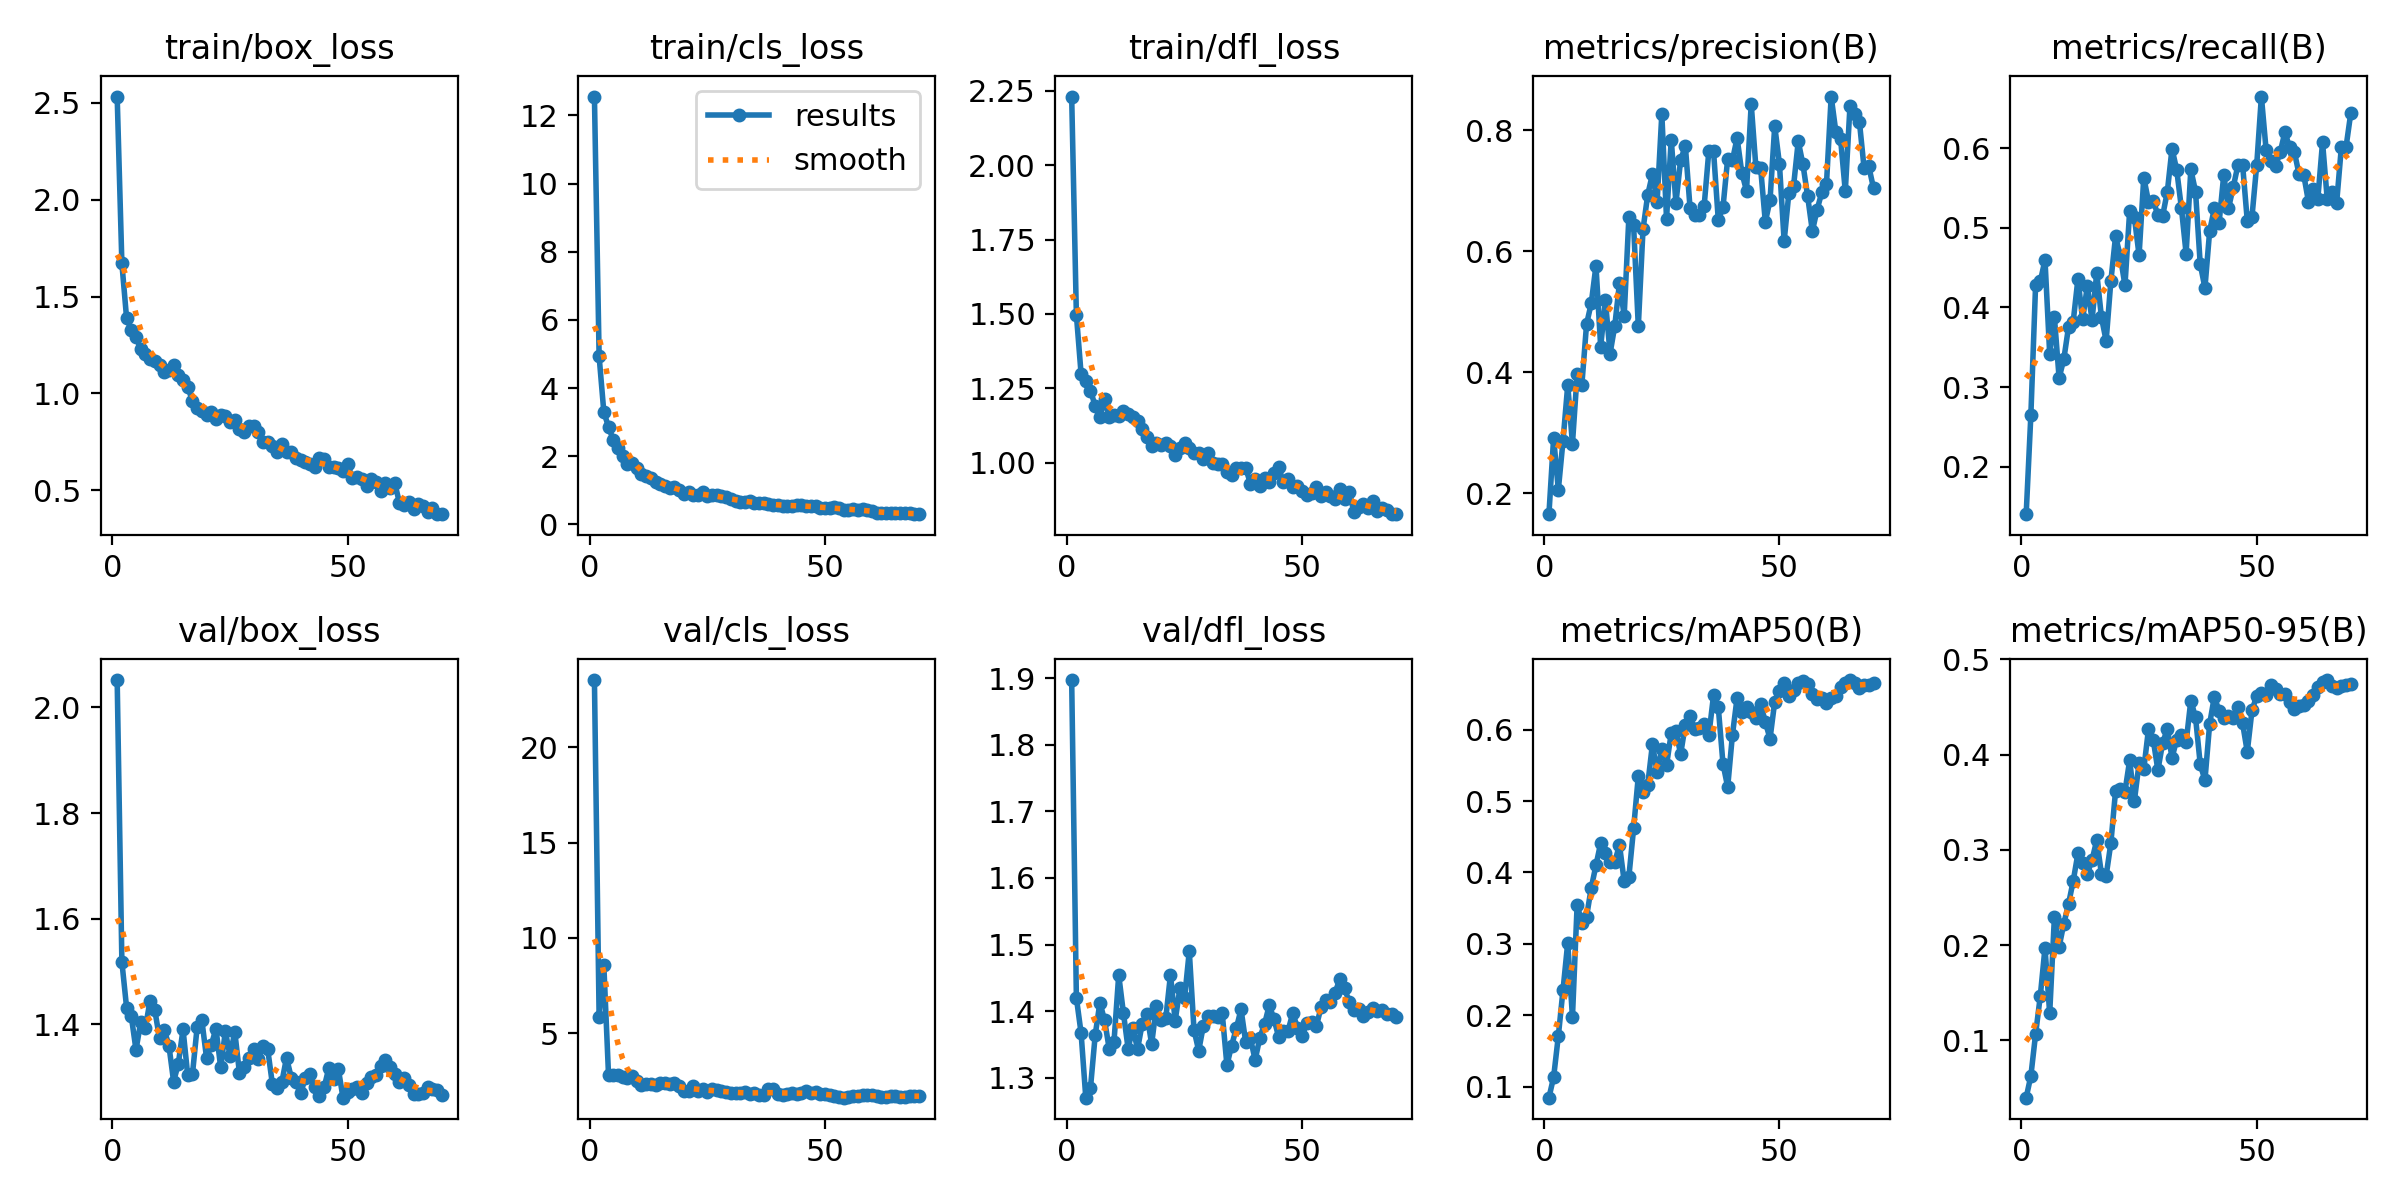

In [40]:
from IPython.display import Image, display
import os

# Define the paths to the run directories for both models
# Replace 'train33' and 'train4' if your run directories have different names
run_dir_nano = '/content/runs/detect/train33'
run_dir_small = '/content/runs/detect/train4'


print("Training plots for YOLOv8 Nano:")
# Display key training plots for the nano model
if os.path.exists(run_dir_nano):
    display(Image(filename=os.path.join(run_dir_nano, 'results.png')))
    # You can display other plots like confusion_matrix.png, labels.jpg, etc.
    # display(Image(filename=os.path.join(run_dir_nano, 'confusion_matrix.png')))
else:
    print(f"Run directory not found for Nano model: {run_dir_nano}")

print("\nTraining plots for YOLOv8 Small:")
# Display key training plots for the small model
if os.path.exists(run_dir_small):
    display(Image(filename=os.path.join(run_dir_small, 'results.png')))
    # You can display other plots as well
    # display(Image(filename=os.path.join(run_dir_small, 'confusion_matrix.png')))
else:
     print(f"Run directory not found for Small model: {run_dir_small}")